In [2]:
import sklearn

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import scipy.stats as stats
import matplotlib.pyplot as plt



    Treatment Group (Group A) - This group is exposed to the new web page, popup form, etc.

    Control Group (Group B) - This group experiences no change from the current setup.


    The number of people clicking through will go down if the pay rate goes up between a and b

In [6]:
control = pd.read_csv('control_data.csv')
exper = pd.read_csv('experiment_data.csv')

In [12]:
control.tail(15)

,Date,Pageviews,Clicks,Enrollments,Payments
22,"Sun, Nov 2",8836,693,206.0,67.0
23,"Mon, Nov 3",9437,788,NaN,NaN
24,"Tue, Nov 4",9420,781,NaN,NaN
25,"Wed, Nov 5",9570,805,NaN,NaN
26,"Thu, Nov 6",9921,830,NaN,NaN
27,"Fri, Nov 7",9424,781,NaN,NaN
28,"Sat, Nov 8",9010,756,NaN,NaN
29,"Sun, Nov 9",9656,825,NaN,NaN
30,"Mon, Nov 10",10419,874,NaN,NaN
31,"Tue, Nov 11",9880,830,NaN,NaN


In [7]:
control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         37 non-null     object 
 1   Pageviews    37 non-null     int64  
 2   Clicks       37 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB


In [8]:
exper.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


In [9]:
exper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         37 non-null     object 
 1   Pageviews    37 non-null     int64  
 2   Clicks       37 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ KB


In [18]:
control_ep = control.dropna()

In [19]:
control_ep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         23 non-null     object 
 1   Pageviews    23 non-null     int64  
 2   Clicks       23 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.1+ KB


In [21]:
control_ep['click_through'] = control_ep['Clicks'] / control_ep['Pageviews']

<ipython-input-21-40163743c061>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_ep['click_through'] = control_ep['Clicks'] / control_ep['Pageviews']


In [22]:
control_ep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           23 non-null     object 
 1   Pageviews      23 non-null     int64  
 2   Clicks         23 non-null     int64  
 3   Enrollments    23 non-null     float64
 4   Payments       23 non-null     float64
 5   click_through  23 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.3+ KB


What do we want to test?
Hypotheses:

1) Site A has more enrollment -less important
2) Site B has more payments -more important

What are we going to measure:
1) click through rate -to control for differences in the websites not involved in pop-up
2) Enrollment rate -To check for hypothesis 1- Enrollment/clicks
3) Payment rate- To check for hypothesis 2- Payment/clicks

In [23]:
control_ep['Enrollment_rate'] = control_ep['Enrollments'] / control_ep['Clicks']

<ipython-input-23-f26361843fc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_ep['Enrollment_rate'] = control_ep['Enrollments'] / control_ep['Clicks']


In [49]:
control_ep['payment_rate'] = control_ep['Payments'] / control_ep['Clicks']

<ipython-input-49-003c3b5ebe96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_ep['payment_rate'] = control_ep['Payments'] / control_ep['Clicks']


In [50]:
exper_ep = exper.dropna()
exper_ep['Enrollment_rate'] = exper_ep['Enrollments'] / exper_ep['Clicks']
exper_ep['payment_rate'] = exper_ep['Payments'] / exper_ep['Clicks']
exper_ep['click_through'] = exper_ep['Clicks'] / exper_ep['Pageviews']

<ipython-input-50-f83496edecce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exper_ep['Enrollment_rate'] = exper_ep['Enrollments'] / exper_ep['Clicks']
<ipython-input-50-f83496edecce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exper_ep['payment_rate'] = exper_ep['Payments'] / exper_ep['Clicks']
<ipython-input-50-f83496edecce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

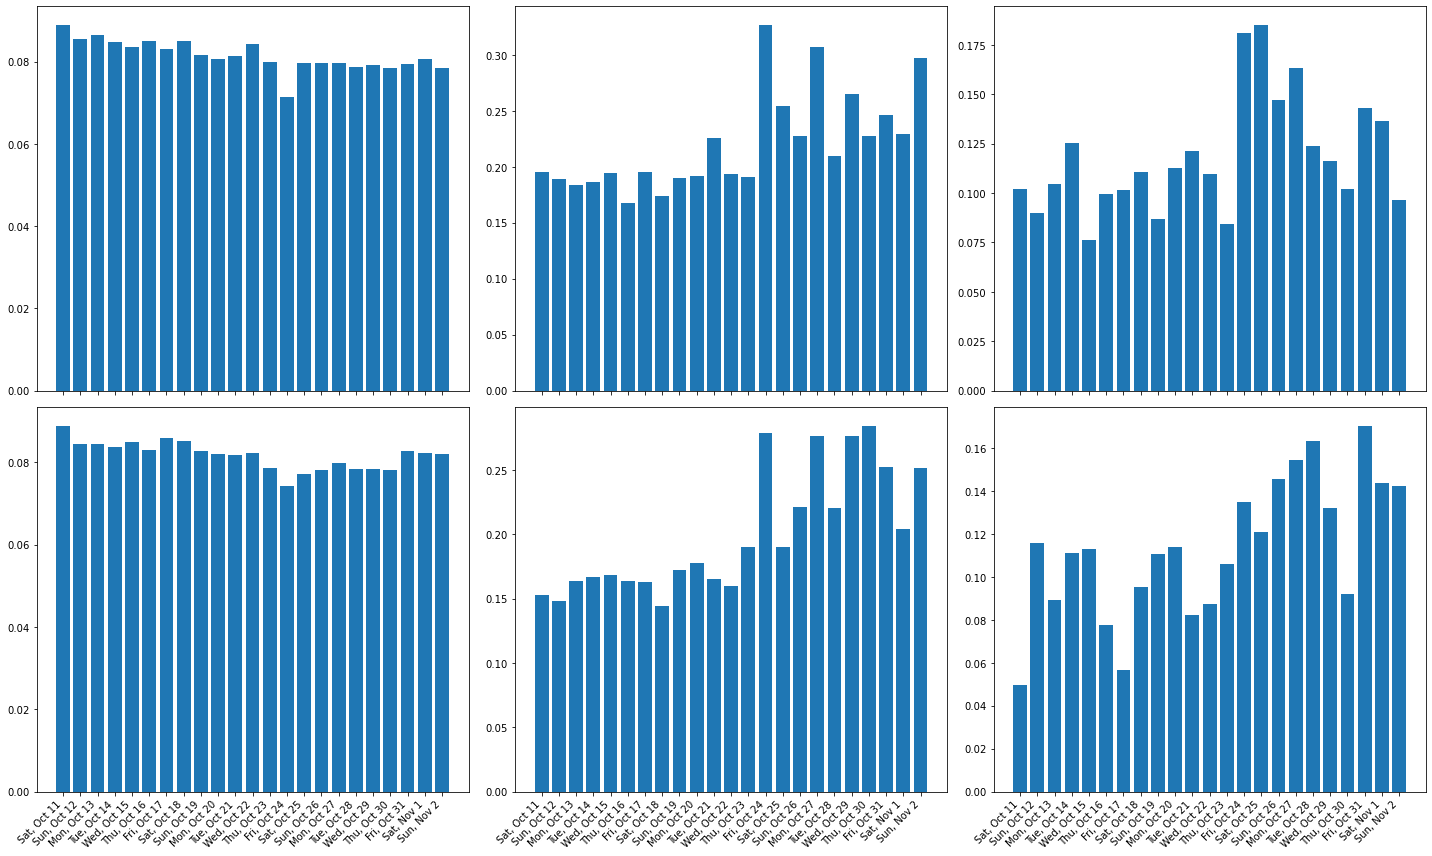

In [51]:
fig,axs = plt.subplots(2,3,figsize=(20,12))

axs[0,0].bar(control_ep['Date'],control_ep['click_through'])
axs[0,1].bar(control_ep['Date'],control_ep['Enrollment_rate'])
axs[0,2].bar(control_ep['Date'],control_ep['payment_rate'])
#axs[1,2].bar(control_ep['Date'],control_ep['Clicks'])
axs[1,0].bar(exper_ep['Date'],exper_ep['click_through'])
axs[1,1].bar(exper_ep['Date'],exper_ep['Enrollment_rate'])
axs[1,2].bar(exper_ep['Date'],exper_ep['payment_rate'])
fig.autofmt_xdate(rotation= 45)
plt.tight_layout()

Frequentist Approach:
Binomial Distributions

Because there does not look to be any clear time dependence, the days will be summed
we'll use scipy.stats cdf find p value-> compare to alpha 0.05

In [56]:
def ttest_act(s1_act, s2_act, s1_cnt, s2_cnt, a=0.05):
    shared_freq=(s1_act+s2_act)/(s1_cnt+s2_cnt)
    shared_var=(s1_cnt+s2_cnt)*shared_freq*(1-shared_freq)/(s1_cnt*s2_cnt)
    difference_in_proportions = stats.binom(0, np.sqrt(shared_var))
    threshold=difference_in_proportions.ppf(1-a)
    diff=s1_act/s1_cnt-s2_act/s2_cnt
    p_val=1-difference_in_proportions.cdf(diff)
    print('threshold={:2.3f}, diff={:2.3f}, p_value={:2.3f}'.format(threshold, diff, p_val))
    return difference_in_proportions 

In [57]:
ttest_act(sum(control_ep['Payments']),sum(exper_ep['Payments']), sum(control_ep['Clicks']), sum(exper_ep['Clicks']))

threshold=0.006, diff=0.005, p_value=0.078


Failed to reject hypthisis that payments are more on the Exper site. p-value of 0.078 is more than 0.05.

In [58]:
ttest_act(sum(control_ep['Enrollments']),sum(exper_ep['Enrollments']), sum(control_ep['Clicks']), sum(exper_ep['Clicks']))

threshold=0.007, diff=0.021, p_value=0.000


In [62]:
stats.binom.cdf(sum(exper_ep['Clicks']), np.mean(exper_ep['Enrollment_rate']))

TypeError: _parse_args() missing 1 required positional argument: 'p'

<BarContainer object of 100 artists>

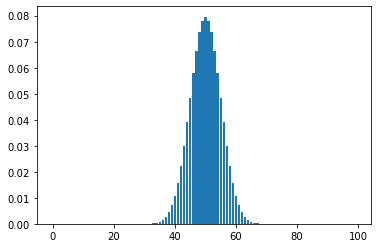

In [8]:
dist = stats.binom(100, .5)
fig , ax = plt.subplots(1)
x = range(100)
y = [dist.pmf(i) for i in x]
ax.bar(x,y)